In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from time import sleep

In [1]:
import pyzbar.pyzbar as pyzbar

In [2]:
# open cv has their image layouts as b g r so we need to flip it because matplotlib uses r g b
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
cam=cv2.VideoCapture(0)
_,img=cam.read()
#release camera
cam.release()

In [4]:
img = convertToRGB(img)

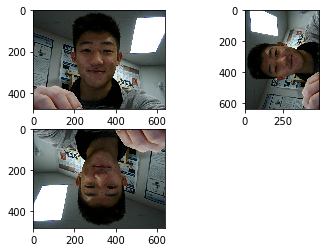

In [6]:
for i in range(0, img.shape[2]):
    plt.subplot(2, 2, i+1)
    plt.imshow(np.rot90(img, i))

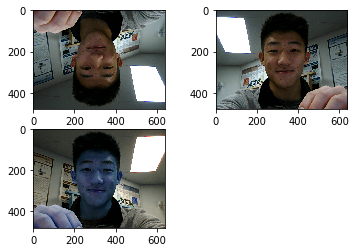

In [7]:
for i in range(0, img.shape[2]):
    plt.subplot(2, 2, i+1)
    plt.imshow(np.flip(img, i))

In [8]:
haar_face_cascade = cv2.CascadeClassifier('../haarcascades/haarcascade_frontalface_alt.xml')
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
    #just making a copy of image passed, so that passed image is not changed 
    img_copy = colored_img.copy()          

    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)          

    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);          

    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)              

    return img_copy

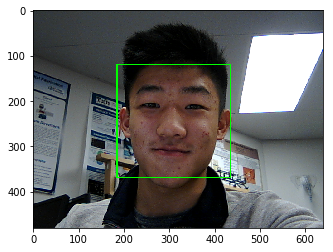

In [10]:
#load another image 
cam=cv2.VideoCapture(0)
_, test2 =cam.read()

#call our function to detect faces 
faces_detected_img = detect_faces(haar_face_cascade, test2)  

#convert image to RGB and show image 
plt.imshow(convertToRGB(faces_detected_img))
cam.release()

(480, 640, 3)


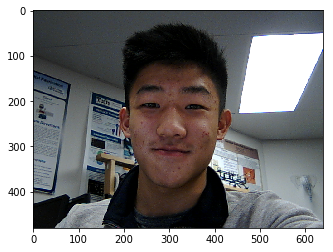

In [43]:
# another way to convert to RGB using numpy indexing
plt.imshow(test2[...,::-1])
print(test2.shape)

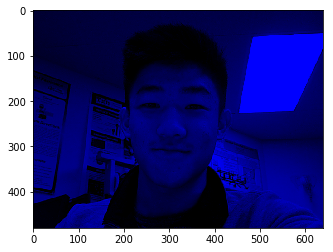

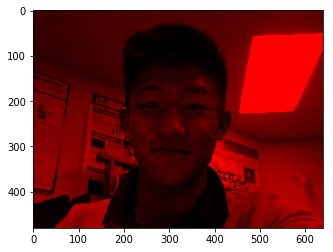

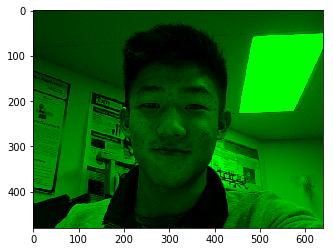

In [39]:
#set blue pixels to 0
b = test2.copy()
# set red and green channels to 0
b[:, :, 0] = 0
b[:, :, 1] = 0
plt.imshow(b)
plt.show()

r = test2.copy()
# set red and green channels to 0
r[:, :, 1] = 0
r[:, :, 2] = 0
plt.imshow(r)
plt.show()


g = test2.copy()
# set red and green channels to 0
g[:, :, 0] = 0
g[:, :, 2] = 0
plt.imshow(g)
plt.show()


### Grayscale
- grayscale is simply the magnitude of brightness
- Grayscale = (R + G + B / 3)

(480, 640)


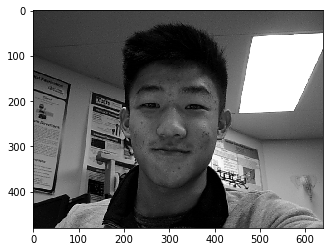

(480, 640)


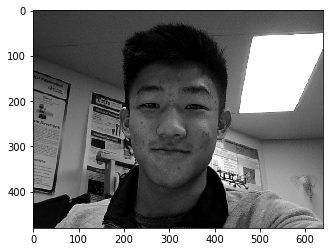

In [59]:
#using opencv
img_gray=cv2.cvtColor(test2,cv2.COLOR_BGR2GRAY)
print(img_gray.shape) #now the image has just one channel
plt.imshow(img_gray[...,:],cmap='gray') #cmap='gray' is required to show the image correctly
plt.show()

#using numpy
img_gray_numpy = np.mean(test2, axis = 2)
print(img_gray_numpy.shape)
plt.imshow(img_gray_numpy[...,:],cmap='gray')
plt.show()

### Canny Edge Detection

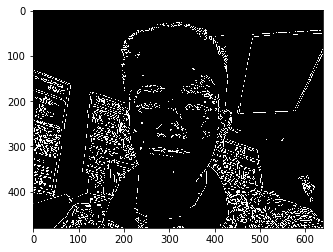

In [57]:
img_canny = cv2.Canny(test2,70,140)
plt.imshow(img_canny[...,:],cmap='gray')
plt.show()

### Blurring
- important for removing noise
- https://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html

Notes:
- the boundary of a collection of points or shape is called a “hull”. A boundary that does not have any concavities is called a “Convex Hull”